<a href="https://colab.research.google.com/github/dimaakapout/MyProjects/blob/master/help/001_PyTorch_tutorial_MySimpleNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch введение

Решим простую классификацию с помощью простейшей нейросети на PyTorch

In [0]:
# Import 

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt



# Данные для классификации

In [0]:
X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_redundant=0, 
                           flip_y=0, 
                           class_sep=1)

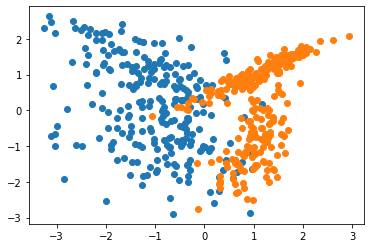

In [4]:
plt.scatter(X[y==0][:,0],X[y==0][:,1]) 
plt.scatter(X[y==1][:,0],X[y==1][:,1])

# neural network

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

### Архитектура сети

In [153]:
class Net(nn.Module):

    def __init__(self):
       # Описываем только слои (линейную часть)
        super(Net, self).__init__()

        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2, 10)  # вход - выход
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        # тут описываем все нелинейные параметры сети

        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


net = Net()
print(net)

Net(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [154]:
params = list(net.parameters())
for i in params:
  print(i.size())

torch.Size([10, 2])
torch.Size([10])
torch.Size([1, 10])
torch.Size([1])


In [155]:
# inp - input. Пропустим через сетку 1 пример из X

inp = torch.tensor(X[0,:], dtype=torch.float).unsqueeze(0)
inp

tensor([[-1.6761,  2.4037]])

In [156]:
out = net(inp) # выход сети
out

tensor([[0.5292]], grad_fn=<SigmoidBackward>)

### Loss

In [158]:
out = net(inp) # Выход сети
target = torch.tensor(y[0]).float() # истинная метка класса

criterion = nn.BCELoss() # бинарная кросс-энтропия == логарифм вероятности положительнго класса

loss = criterion(out, target)
print(loss)

tensor(0.7534, grad_fn=<BinaryCrossEntropyBackward>)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [159]:
print(loss.grad_fn)  # Loss
print(loss.grad_fn.next_functions[0][0])  # sigmoid
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # 

### Backprop

In [160]:
net.zero_grad()     # Занулим градиенты

print('net.fc1.bias.grad before backward')
print(net.fc1.bias.grad)

loss.backward()

print('net.fc1.bias.grad after backward')
print(net.fc1.bias.grad)

net.fc1.bias.grad before backward
None
net.fc1.bias.grad after backward
tensor([ 0.0000,  0.1384, -0.1520,  0.0532, -0.0989,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0778])


### Update the weights

weight = weight - learning_rate * gradient

In [169]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(inp)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [170]:
loss

tensor(0.6695, grad_fn=<BinaryCrossEntropyBackward>)

In [173]:
optimizer.zero_grad()   # zero the gradient buffers
output = net(inp)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update
loss

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


tensor(0.6135, grad_fn=<BinaryCrossEntropyBackward>)

### Соединяем все вместе. Обучение

In [0]:
class Net(nn.Module):

    def __init__(self):
       # Описываем только слои (линейную часть)
        super(Net, self).__init__()

        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(2, 10)  # вход - выход
        self.fc2 = nn.Linear(10, 1)

    def forward(self, x):
        # тут описываем все нелинейные параметры сети

        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return x

    def fit(self, input_data, target, epochs=1):
      criterion = nn.BCELoss()
      optimizer = optim.SGD(self.parameters(), lr=0.01)
      for i in range(epochs): # кол-во эпох
        optimizer.zero_grad()
        output = self(input_data)
        try:
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          if i % 50 == 0:
            print(loss)
        except:
          print(i, 'error', loss)
          break


inp_data = torch.tensor(X).float()
target = torch.tensor(y).float()



In [0]:

net = Net()


In [262]:
net.fit(inp_data, target, epochs=750)

tensor(35.3018, grad_fn=<BinaryCrossEntropyBackward>)
43 error tensor(0.4110, grad_fn=<BinaryCrossEntropyBackward>)


/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


In [0]:
out = net(inp_data)

In [265]:
(out.round() == target.reshape(-1,1)).sum()

tensor(416)

In [266]:
416/len(y)

0.832